In [1]:
!pip install qiskit ipywidgets

     |████████████████████████████████| 6.0MB 31.0MB/s 
     |████████████████████████████████| 18.0MB 138kB/s 
     |████████████████████████████████| 235kB 52.6MB/s 
     |████████████████████████████████| 215kB 38.5MB/s 
     |████████████████████████████████| 2.1MB 45.9MB/s 
     |████████████████████████████████| 1.0MB 41.0MB/s 
     |████████████████████████████████| 51kB 7.8MB/s 
     |████████████████████████████████| 194kB 49.1MB/s 
     |████████████████████████████████| 112kB 49.5MB/s 
     |████████████████████████████████| 614kB 34.8MB/s 
     |████████████████████████████████| 3.2MB 37.1MB/s 
     |████████████████████████████████| 6.3MB 51.9MB/s 
  Created wheel for qiskit: filename=qiskit-0.26.2-cp37-none-any.whl size=10491 sha256=92b2ce59c1702085e34c74e9e80ee9eca0eb8d337fab6ade77ddb2c57f966462
  Stored in directory: /root/.cache/pip/wheels/89/89/34/524839952d5a58a7be9789e580bfc1ca883bf6579152444568
  Created wheel for python-constraint: filename=python_constraint-1.4.0

In [2]:
import numpy as np
import networkx as nx  # tool to handle general Graphs 
import matplotlib.pyplot as plt 
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

from qiskit import *
from qiskit import Aer, IBMQ
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
from qiskit.circuit import Parameter

In [3]:
linear = {'q0': -22.0, 'q1': -11.0, 'q2': 58.0, 'q3': 29.0, 'q4': 174.0, 'q5': 87.0, 'q6': -18.0, 'q7': -9.0, 'q8': 94.0, 'q9': 47.0, 'q10': 14.0, 'q11': 7.0}
quadratic = {('q0', 'q1'): 6.0, ('q2', 'q3'): 6.0, ('q0', 'q4'): -22.0, ('q1', 'q4'): -11.0, ('q2', 'q4'): 22.0, ('q3', 'q4'): 11.0, ('q0', 'q5'): -11.0, ('q1', 'q5'): -5.5, ('q2', 'q5'): 11.0, ('q3', 'q5'): 5.5, ('q4', 'q5'): 26.0, ('q0', 'q6'): 22.0, ('q1', 'q6'): 11.0, ('q2', 'q6'): -22.0, ('q3', 'q6'): -11.0, ('q0', 'q7'): 11.0, ('q1', 'q7'): 5.5, ('q2', 'q7'): -11.0, ('q3', 'q7'): -5.5, ('q6', 'q7'): 26.0, ('q0', 'q8'): -16.0, ('q1', 'q8'): -8.0, ('q2', 'q8'): 16.0, ('q3', 'q8'): 8.0, ('q4', 'q8'): 30.0, ('q5', 'q8'): 15.0, ('q6', 'q8'): -30.0, ('q7', 'q8'): -15.0, ('q0', 'q9'): -8.0, ('q1', 'q9'): -4.0, ('q2', 'q9'): 8.0, ('q3', 'q9'): 4.0, ('q4', 'q9'): 15.0, ('q5', 'q9'): 7.5, ('q6', 'q9'): -15.0, ('q7', 'q9'): -7.5, ('q8', 'q9'): 18.0, ('q0', 'q10'): 16.0, ('q1', 'q10'): 8.0, ('q2', 'q10'): -16.0, ('q3', 'q10'): -8.0, ('q4', 'q10'): -30.0, ('q5', 'q10'): -15.0, ('q6', 'q10'): 30.0, ('q7', 'q10'): 15.0, ('q0', 'q11'): 8.0, ('q1', 'q11'): 4.0, ('q2', 'q11'): -8.0, ('q3', 'q11'): -4.0, ('q4', 'q11'): -15.0, ('q5', 'q11'): -7.5, ('q6', 'q11'): 15.0, ('q7', 'q11'): 7.5, ('q10', 'q11'): 18.0}
V = [v*(-1) for v in linear.values()]
E = []
for i, key in enumerate(quadratic):
    E.append((int(key[0][1:]), int(key[1][1:]), (-1)*list(quadratic.values())[i]))
print(V)
print(E)

[22.0, 11.0, -58.0, -29.0, -174.0, -87.0, 18.0, 9.0, -94.0, -47.0, -14.0, -7.0]
[(0, 1, -6.0), (2, 3, -6.0), (0, 4, 22.0), (1, 4, 11.0), (2, 4, -22.0), (3, 4, -11.0), (0, 5, 11.0), (1, 5, 5.5), (2, 5, -11.0), (3, 5, -5.5), (4, 5, -26.0), (0, 6, -22.0), (1, 6, -11.0), (2, 6, 22.0), (3, 6, 11.0), (0, 7, -11.0), (1, 7, -5.5), (2, 7, 11.0), (3, 7, 5.5), (6, 7, -26.0), (0, 8, 16.0), (1, 8, 8.0), (2, 8, -16.0), (3, 8, -8.0), (4, 8, -30.0), (5, 8, -15.0), (6, 8, 30.0), (7, 8, 15.0), (0, 9, 8.0), (1, 9, 4.0), (2, 9, -8.0), (3, 9, -4.0), (4, 9, -15.0), (5, 9, -7.5), (6, 9, 15.0), (7, 9, 7.5), (8, 9, -18.0), (0, 10, -16.0), (1, 10, -8.0), (2, 10, 16.0), (3, 10, 8.0), (4, 10, 30.0), (5, 10, 15.0), (6, 10, -30.0), (7, 10, -15.0), (0, 11, -8.0), (1, 11, -4.0), (2, 11, 8.0), (3, 11, 4.0), (4, 11, 15.0), (5, 11, 7.5), (6, 11, -15.0), (7, 11, -7.5), (10, 11, -18.0)]


In [20]:
n = 12

#gamma  = 1.9
#gamma  = 0.6
#beta   = 0.2


beta = Parameter('β')
theta = Parameter('θ')
#phi = Parameter('φ')



# prepare the quantum and classical resisters
qc = QuantumCircuit(n, n)

# apply the layer of Hadamard gates to all qubits
qc.h(range(n))
qc.barrier()

# apply the Ising type gates with angle gamma along the edges in E
for edge in E:
    #print(edge)
    k = edge[0]
    l = edge[1]
    qc.rzz(2*edge[2]*theta, k, l)
    #qc.rzz(theta, k, l)
    #qc.rzz(-2*gamma, k, l)
    #qc.barrier()

qc.barrier()
    
    
for i in range(len(V)):
    qc.rz(-2*V[i]*theta, i)
    #qc.rz(phi, i)

# then apply the single qubit X rotations with angle beta to all qubits
qc.barrier()
qc.rx(2*beta, range(len(V)))

# Finally measure the result in the computational basis
qc.barrier()
qc.measure(range(len(V)),range(len(V)))

### draw the circuit for comparison
qc.draw()

┌───┐ ░                                                      »
 q_0: ┤ H ├─░──■─────────────■─────────────────────────■───────────»
      ├───┤ ░  │ZZ(-12.0*θ)  │                         │           »
 q_1: ┤ H ├─░──■─────────────┼────────────■────────────┼───────────»
      ├───┤ ░                │            │            │           »
 q_2: ┤ H ├─░──■─────────────┼────────────┼────────────┼───────────»
      ├───┤ ░  │ZZ(-12.0*θ)  │            │            │           »
 q_3: ┤ H ├─░──■─────────────┼────────────┼────────────┼───────────»
      ├───┤ ░                │ZZ(44.0*θ)  │ZZ(22.0*θ)  │           »
 q_4: ┤ H ├─░────────────────■────────────■────────────┼───────────»
      ├───┤ ░                                          │ZZ(22.0*θ) »
 q_5: ┤ H ├─░──────────────────────────────────────────■───────────»
      ├───┤ ░                                                      »
 q_6: ┤ H ├─░──────────────────────────────────────────────────────»
      ├───┤ ░                                                      »
 q_7: ┤ H ├─░──────────────────────────────────────────────────────»
      ├───┤ ░                                                      »
 q_8: ┤ H ├─░──────────────────────────────────────────────────────»
      ├───┤ ░                                                      »
 q_9: ┤ H ├─░──────────────────────────────────────────────────────»
      ├───┤ ░                                                      »
q_10: ┤ H ├─░──────────────────────────────────────────────────────»
      ├───┤ ░                                                      »
q_11: ┤ H ├─░──────────────────────────────────────────────────────»
      └───┘ ░                                                      »
c: 12/═════════════════════════════════════════════════════════════»
                                                                   »
«                                                                           »
« q_0: ────────────────────────────■────────────────────────────────────────»
«                                  │                                        »
« q_1: ───────────────■────────────┼────────────────────────────────────────»
«                     │            │                                        »
« q_2: ─■─────────────┼────────────┼───────────────────────────■────────────»
«       │             │            │                           │            »
« q_3: ─┼─────────────┼────────────┼─────────────■─────────────┼────────────»
«       │ZZ(-44.0*θ)  │            │             │ZZ(-22.0*θ)  │            »
« q_4: ─■─────────────┼────────────┼─────────────■─────────────┼────────────»
«                     │ZZ(11.0*θ)  │                           │ZZ(-22.0*θ) »
« q_5: ───────────────■────────────┼───────────────────────────■────────────»
«                                  │ZZ(-44.0*θ)                             »
« q_6: ────────────────────────────■────────────────────────────────────────»
«                                                                           »
« q_7: ─────────────────────────────────────────────────────────────────────»
«                                                                           »
« q_8: ─────────────────────────────────────────────────────────────────────»
«                                                                           »
« q_9: ─────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_10: ─────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_11: ─────────────────────────────────────────────────────────────────────»
«                                                                           »
«c: 12/═════════════════════════════════════════════════════════════════════»
«                                                                           »
«                                    

In [21]:
print(qc.parameters)
step_size = 0.1
a_gamma         = np.arange(0, np.pi, step_size)
a_beta          = np.arange(0, np.pi, step_size)
a_gamma, a_beta = np.meshgrid(a_gamma,a_beta)

gammas = np.linspace(0, np.pi, 16)
betas = np.linspace(0, np.pi, 16)

ParameterView([Parameter(β), Parameter(θ)])


In [22]:
# Compute the value of the cost function
# x = {+1, -1}
def cost_function_C(x,E,V):
    
    #print(x)
    
    if(len(x) != n):
        return np.nan
        
    C = 0;
    for index in E:
        e1 = index[0]
        e2 = index[1]
        
        w      = index[2]
        #print('e1: ', e1)
        #print('e2: ', e2)
        #print('w: ', w)
        C = C + w* x[n-1-e1]*x[n-1-e2]
        
    #print(C)
    for i in range(len(V)):
        C = C + V[i]*x[n-1-i]
        
    return C

<module 'qiskit.circuit' from '/usr/local/lib/python3.7/dist-packages/qiskit/circuit/__init__.py'>
256


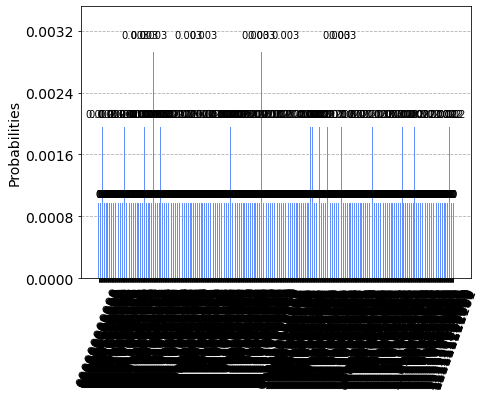

In [23]:
i=0

#print(type(np.meshgrid(gammas, betas)[0]))


#print(np.meshgrid(gammas, betas)[0].flatten().tolist())

#for (g, b) in zip(gammas, betas):
#    print(g)
#    print(b)
#    i=i+1
#    print(i)
          
#print(np.meshgrid(gammas, betas)[1])

# run on local simulator
backend = Aer.get_backend("qasm_simulator")
shots = 1024

#TQAOA = transpile(QAOA, backend)
#qobj = assemble(TQAOA, shots=shots)
#QAOA_results = backend.run(qobj).result()

#plot_histogram(QAOA_results.get_counts(),figsize = (8,6),bar_labels = False)
tl, bl = np.meshgrid(gammas, betas)
tl = tl.flatten().tolist()
bl = bl.flatten().tolist()
#job = execute(circuit, backend=backend, shots=1024, parameter_binds=[{beta: b,theta: t} for (t,b) in zip(tl,bl)])
#job = execute(circuit, backend=backend, shots=1024, parameter_binds=[{beta: 0.0,theta: t} for t in gammas])

print(circuit)

circuits = [ qc.bind_parameters({theta: t, beta: b}) for (t,b) in zip(tl, bl) ]
job = execute(circuits, backend=backend, shots=1024)

result = job.result()
counts = result.get_counts()
print(len(counts))
#print(counts)

plot_histogram(counts[0])

In [24]:
# Evaluate the data from the simulator


#hist        = {}
means = []



for count in counts:
    avr_C       = 0
    max_C       = [0,0]
    tmp_eng = 0.0
    
    for sample in list(count.keys()):
        #print(sample)
        # use sampled bit string x to compute C(x)
        x         = [2*int(num)-1 for num in list(sample)]
        #print(x)
        #print(count[sample]/shots)
        tmp_eng   = cost_function_C(x,E,V)

        # compute the expectation value and energy distribution
        avr_C     = avr_C    + count[sample]*tmp_eng
        #hist[str(round(tmp_eng))] = hist.get(str(round(tmp_eng)),0) + counts[sample]
        #print(hist)
        #plot_histogram(hist)

        # save best bit string
        if( max_C[1] < tmp_eng):
            max_C[0] = sample
            max_C[1] = tmp_eng

    M1_sampled   = avr_C/shots
    means = means + [M1_sampled]
    #print(M1_sampled)
    
print('Max means: ', max(means))
print('The approximate solution is x* = %s with C(x*) = %d \n' % (max_C[0],max_C[1]))

# Max = 446

Max means:  130.365234375
The approximate solution is x* = 001001000010 with C(x*) = 446 



In [26]:
# calculated solution
cost_function_C([-1,-1,1,-1,-1,1,-1,-1,-1,-1,1,-1], E, V)

446.0

In [25]:
print('Circuit depth: ', qc.depth())

Circuit depth:  21
